# 最小二乘法

考虑有一组m个数据点(x1, y1), (x2, y2),……, (xm, ym)

模型函数表示为： 
$$ y(x) = f(x, \beta)\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)$$

其中 $\beta = [\beta_1, \beta_2, \dots, \beta_n]^T$ 表示待拟合参数，n表示待拟合参数的数量，其中m > n

模型`残差`定义为： 
$$r_i = y_i - f(x_i, \beta)\ \ \ \ for\ i = 1, 2, \dots, m\ \ \ \ \ \ \ \ \ \ \ \ (2)$$

最小二乘法的目标就是通过最小化残差平方和RSS来估计 $\beta$

$$RSS(\beta) = \| r \|^2 = r^Tr = \sum_{i=1}^n r_i^2$$

## 推导线性最小二乘法公式

在线性最小二乘法中，拟合的数学表达式：
$$y = \sum_{j=1}^n f_j(x)\beta_j = X\beta$$
其中 $\beta$ 是一个n个元素的列向量，X是一个m行n列的矩阵，m是数据点个数，n是拟合参数的个数。

矩阵求导公式, 下面要用到：

公式1: $$\frac{dAX}{dX} = A^T$$

公式2: $$\frac{dX^TA}{dX} = A$$

公式3: $$\frac{dX^TAX}{dX} = (A + A^T)X$$

最小二乘法要求对 $\beta$ 求解，使得RSS最小，即：$$ \frac{\partial RSS(\beta)}{\partial \beta} = 0$$

即：
$$
\begin{align}
\frac{\partial r^Tr}{\partial \beta}
     = \frac{\partial ((y - f(x, \beta))^T(y - f(x,\beta)))}{\partial \beta} \\[4mm]
     = \frac{\partial ((y - X\beta)^T(y - X\beta))}{\partial \beta} \\[4mm]
     = \frac{\partial ((y^T -\beta^TX^T)(y - X\beta))}{\partial \beta}\\[4mm]
     = \frac{\partial(y^Ty - y^TX\beta-\beta^TX^Ty+\beta^TX^TX\beta)}{\partial \beta}\\[4mm]
     = \frac{\partial y^Ty}{\partial \beta} - \frac{\partial y^TX\beta}{\partial \beta}
     - \frac{\partial \beta^TX^Ty}{\partial \beta} + \frac{\partial \beta^TX^TX\beta}{\partial \beta}
     = 0
\end{align}     
$$

根据矩阵的求导公式，即可得到：
$$
-X^Ty -X^Ty + (X^TX + (X^TX)^T)\beta = 0
$$
简化可得： $$X^TX\beta = X^Ty$$
因此 $$\beta = (X^TX)^{-1}X^Ty$$

方法2====================================================================================================================
$$
\frac{\partial r^Tr}{\partial \beta}
     = \frac{\partial \| y - X\beta \|^2}{\partial \beta} \\[4mm]
     = \frac{\partial (y^Ty - 2y^TX\beta + \beta^TX^TX\beta)}{\partial \beta} \\[4mm]
     = 0 - 2X^Ty + (X^TX + (X^TX)^T)\beta = 0
$$
简化可得： $$X^TX\beta = X^Ty$$
因此 $$\beta = (X^TX)^{-1}X^Ty$$

至此，线性最小二乘法的公式推导完毕。

## 非线性最小二乘法
对于线性最小二乘法我们可以分析他的导函数形式，但是对于复杂的情况，导函数不好写或者根本写不出来，这时需要采用迭代的方式求取。

**迭代方式**

1. 给定初始值$X_0$
2. 对于第k次迭代，寻找一个合适的增量 $\Delta X_k$, 使得 $\| f(X_k + \Delta X_k) \|^2$最小
3. 若$\Delta X_k$足够小，则停止
4. 否则， 令 $X_{k+1} = X_k + \Delta X_k$, 返回2

**如何寻找增量**

泰勒展开：
$$\| f(\beta_k + \Delta \beta) \|^2 \approx \| f(\beta_k)\|^2 + J(\beta_k)\Delta \beta + \frac{1}{2}\Delta \beta^TH(\beta_k)\Delta \beta$$

其中H是m行m列的Hessian矩阵，存在关系有 $H = J^TJ$ ,其中J是雅可比矩阵

### 梯度下降法： 保留一阶

即 $$\| f(\beta_k + \Delta \beta) \|^2 \approx \| f(\beta_k)\|^2 + J(\beta_k)\Delta \beta$$

$J_F(x)$ 即为F(x)的梯度，沿着引力势梯度相反的方向高度下降的最快。

从某个初值 $\beta_0$出发， 每次都取 $\Delta \beta = -\alpha J^T(\beta)$ ，$\alpha$ 是一个控制步长大小的系数。


### 牛顿迭代法： 保留二阶。
$$\| f(\beta_k + \Delta \beta) \|^2 \approx \| f(\beta_k)\|^2 + J(\beta_k)\Delta \beta + \frac{1}{2}\Delta \beta^TH(\beta_k)\Delta \beta$$

将上式对 $\Delta \beta$ 求偏导，令其为0，则有关于 $\Delta \beta$的方程
$$J(\beta_k) + \frac{1}{2}[H(\beta_k + H(\beta_k)^T)]\Delta \beta = 0$$

hessian矩阵为对称矩阵， $H^T = H$， 因此
$$ J(\beta_k) + H(\beta_k)\Delta \beta = 0$$
即
$$\Delta \beta = -H^{-1}J$$


### 高斯-牛顿法

把$r_i$作泰勒展开：
$$r_i(\beta + \Delta \beta) \approx r_i(\beta) + J_i(\beta)\Delta \beta$$
则：
$$r(\beta + \Delta \beta)  = r(\beta) + J_r(\beta)\Delta \beta$$

因此：
$$
\frac{\partial \| r(\beta) + J(\beta)\Delta \beta \|^2}{\partial \Delta \beta} \\[4mm]
= \frac{\partial (\|f(\beta)\|^2 + 2r(\beta)^TJ(\beta)\Delta \beta + \Delta \beta^TJ(\beta)^TJ(\beta)\Delta \beta)}{\partial \Delta \beta} \\[4mm]
= 2J(\beta)^Tr(\beta) + 2J(\beta)^TJ(\beta)\Delta \beta = 0
$$

因此：
$$
J(\beta)^TJ(\beta)\Delta \beta = -J(\beta)^Tr(\beta)
$$

从而：
$$
\Delta \beta = -(J^TJ)^{-1}J^Tr
$$

## 拟合参数的协方差矩阵的计算

$\Delta \beta$的协方差矩阵可以写为：
$$
\text{Cov}(\boldsymbol{\Delta \beta}) = \mathbb{E}[\Delta \boldsymbol{\beta} \Delta \boldsymbol{\beta}^\top] \\[4mm]
= (J^TJ)^{-1}J^Trr^TJ[(J^TJ)^{-1}]^T
$$

由于hessian矩阵是对称矩阵，则它的逆也是对称矩阵，因此：
$$[(J^TJ)^{-1}]^T = (J^TJ)^{-1}$$

又由于$rr^T = \sigma^2I$, 

这个公式的存在其实是因为那个高斯噪声$\epsilon_i$的分布，那个的分布就是残差的期望分布，每个变量相互独立，协方差为0，只有对角线上元素为$\sigma^2$

将上面的两个公式带入，化简可得：

$$
\text{Cov}(\boldsymbol{\Delta \beta}) =  \sigma^2(J^TJ)^{-1}J^TJ(J^TJ)^{-1}
$$

由于$(J^TJ)^{-1}J^TJ$等于单位矩阵，则：
$$
\text{Cov}(\boldsymbol{\Delta \beta}) =  \sigma^2(J^TJ)^{-1}
$$

在统计学意义上，$\beta$参数不确定性来源于 $\Delta \beta$
则：
$$\text{Cov}(\boldsymbol{\beta}) = \text{Cov}(\boldsymbol{\Delta \beta}) =  \sigma^2(J^TJ)^{-1}$$

参考：

【1】https://www.bilibili.com/video/BV1xh4y1Z7ku/?spm_id_from=333.1007.top_right_bar_window_custom_collection.content.click&vd_source=099edd8ba094e7ddc14190b99d15a5fe

【2】https://www.bilibili.com/video/BV1134y1k7gv/?spm_id_from=333.788.top_right_bar_window_custom_collection.content.click&vd_source=099edd8ba094e7ddc14190b99d15a5fe

【3】https://blog.csdn.net/wangqy3811457/article/details/123186754

【4】https://en.wikipedia.org/wiki/Non-linear_least_squares

【5】https://en.wikipedia.org/wiki/Linear_least_squares

有博主推荐的一篇论文，我还没看：

推荐一篇超级好的论文：http://www2.imm.dtu.dk/pubdb/edoc/imm3215.pdf

### 个人的思考总结
对于鸡兔同笼问题，如果系数矩阵A是满秩矩阵（行满秩且列满秩）则，A是一个方阵，如果行列式det(A) 不等于0， 此时可以直接用A的逆来解题。

所以如果鸡兔同笼问题，我的数据里面存在线性相关的数据，会存在两个问题：
1. 数据不是一个方阵，不是方阵无法求逆
2. 由于行不满秩，所以它的行列式为零，即便是方阵也无法求逆

在**鸡兔同笼问题**中，如果数据存在线性相关的行，理论上，你可以通过删除那些线性相关的行（或者保留其中一些线性无关的向量），然后求解简化后的方程。构造出一个满秩矩阵（行满秩且列满秩），进而可以通过求逆来得到解。

然而，使用**伪逆**的方式，你不需要手动简化矩阵，也不必单独去寻找哪些行是线性无关的。伪逆自动处理了这些问题，通过最小二乘法为你找到一个“最优解”。伪逆不仅可以在矩阵是奇异的（即无法求逆）时提供解，还能够处理矩阵列或行之间存在线性相关性的问题。因此，伪逆的应用避免了繁琐的矩阵简化步骤，也能够更为简便和鲁棒地解决问题。

举个例子，如果你使用伪逆，计算方式可以是：

$ \mathbf{X}^\dagger = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T $

其中，$\mathbf{X}^+$是伪逆矩阵，$\mathbf{X}$是你的设计矩阵，公式计算的是最小二乘解。即便矩阵的秩不满或数据存在线性相关性，伪逆也能给出一个合理的解。

总结来说，伪逆方法比起手动删除线性相关的行，提供了一个更简洁和方便的解决方案，尤其在处理复杂或不完美的数据时，它更为高效。


## 尝试实现线性最小二乘法

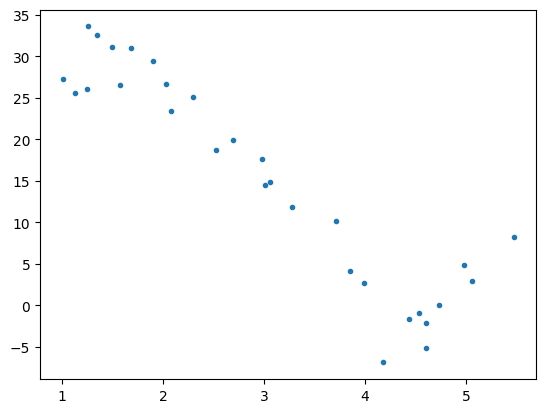

In [409]:
import numpy as np
import matplotlib.pyplot as plt

def myfunc(x, c):
    res = np.zeros_like(x)
    for i in range(len(c)):
        res += c[i]*x**i

    return res

n = 30
c = [20, 6, 5, -5, 1, -0.0555]
er = 0.1
x = np.random.rand(n)*5 + 0.5
y0 = myfunc(x, c)

ey = np.max(y0) * er * np.random.randn(n)
y = y0 + ey
plt.plot(x, y, ".")

In [410]:
# 定义残差函数
def residuals(params, x, y, my_func):
    return y - my_func(x, params)

# 定义雅可比矩阵计算的数值方法
def numerical_jacobian(params, x, y, my_func, epsilon=1e-6):
    num_params = len(params)
    num_data = len(x)
    J = np.zeros((num_data, num_params))
    for i in range(num_params):
        params_step_up = params.copy()
        params_step_down = params.copy()
        params_step_up[i] += epsilon
        params_step_down[i] -= epsilon
        J[:, i] = (residuals(params_step_up, x, y, my_func) - residuals(params_step_down, x, y, my_func)) / (2 * epsilon)
    return J

In [411]:
x = np.array(x)
y = np.array(y)
x_matrix = [pow(x, i) for i in range(6)]
x_matrix = np.array(x_matrix).T

params = np.linalg.inv(x_matrix.T @ x_matrix) @ x_matrix.T @ y
params

array([ 2.96213343e+00,  4.18448764e+01, -2.06829328e+01,  3.59901298e+00,
       -4.03091271e-01,  3.44426444e-02])

In [412]:
# 计算残差，并计算残差的方差。
r = residuals(params, x, y, myfunc)
r.var()

6.872898930870005

In [413]:
J = numerical_jacobian(params, x, y, myfunc)
inv_H = np.linalg.inv(J.T @ J)
inv_H * r.var()

array([[ 1.42323602e+03, -2.85493210e+03,  2.09610397e+03,
        -7.12410160e+02,  1.13424931e+02, -6.83855466e+00],
       [-2.85493210e+03,  5.79560439e+03, -4.30056492e+03,
         1.47465867e+03, -2.36493750e+02,  1.43434723e+01],
       [ 2.09610397e+03, -4.30056492e+03,  3.22377172e+03,
        -1.11524343e+03,  1.80186948e+02, -1.09963515e+01],
       [-7.12410160e+02,  1.47465867e+03, -1.11524343e+03,
         3.88901120e+02, -6.32680461e+01,  3.88383696e+00],
       [ 1.13424931e+02, -2.36493750e+02,  1.80186948e+02,
        -6.32680461e+01,  1.03556036e+01, -6.39081678e-01],
       [-6.83855466e+00,  1.43434723e+01, -1.09963515e+01,
         3.88383696e+00, -6.39081678e-01,  3.96264220e-02]])

对于线性最小二乘法，它的雅可比矩阵就是系数矩阵

In [414]:
# 可以发现和用那个数值的雅可比矩阵计算的结果一致。
np.linalg.inv(x_matrix.T @ x_matrix) * r.var()

array([[ 1.42323683e+03, -2.85493378e+03,  2.09610525e+03,
        -7.12410608e+02,  1.13425004e+02, -6.83855913e+00],
       [-2.85493378e+03,  5.79560786e+03, -4.30056757e+03,
         1.47465959e+03, -2.36493901e+02,  1.43434815e+01],
       [ 2.09610525e+03, -4.30056757e+03,  3.22377374e+03,
        -1.11524414e+03,  1.80187063e+02, -1.09963586e+01],
       [-7.12410608e+02,  1.47465959e+03, -1.11524414e+03,
         3.88901367e+02, -6.32680864e+01,  3.88383944e+00],
       [ 1.13425004e+02, -2.36493901e+02,  1.80187063e+02,
        -6.32680864e+01,  1.03556101e+01, -6.39082080e-01],
       [-6.83855913e+00,  1.43434815e+01, -1.09963586e+01,
         3.88383944e+00, -6.39082080e-01,  3.96264467e-02]])

In [415]:
def draw(x, y, params, my_func):

    # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.1, 0.20
    spacing = 0.008

    rect_plot = [left, bottom + height + spacing, width, 0.65]
    rect_resd = [left, bottom, width, height]

    # start with a square Figure
    fig = plt.figure()
    ax = fig.add_axes(rect_plot)
    ax_resd = fig.add_axes(rect_resd, sharex=ax)

    xf = np.linspace(0, np.max(x), 100)
    yf = my_func(xf, params)

    ax.plot(x, y, ".")
    ax.plot(xf, yf)
    ax.grid(True)
    ax.set_ylabel("y")

    r = residuals(params, x, y, my_func)
    r_std = np.std(r, ddof=1)
    res = r / r_std # 归一化

    ax_resd.plot(x, res, ".")
    ax_resd.axhline(0, ls=":")
    ax_resd.axhline(1, ls=":")
    ax_resd.axhline(-1, ls=":")
    ax_resd.grid(True)
    ax_resd.set_ylabel('Residuals')
    ax_resd.set_xlabel('x')
    plt.show()

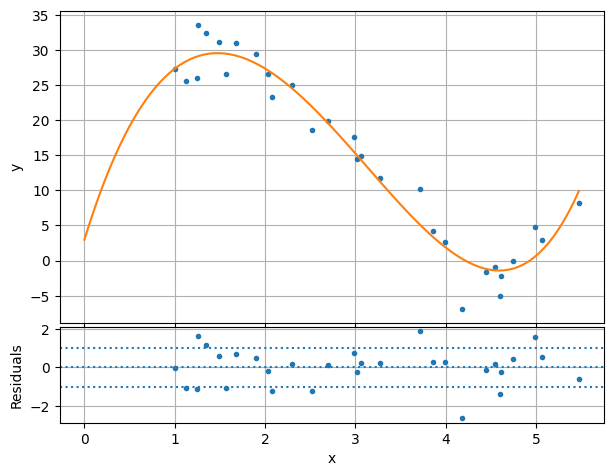

In [416]:
draw(x, y, params=params, my_func=myfunc)

对比调包计算的结果，结果一致，可惜调包的方法无法给出协方差矩阵。

In [417]:
import scipy.linalg as splin

cf, resid, rank, sigma = splin.lstsq(x_matrix, y)
print(cf)

[ 2.96213341e+00  4.18448765e+01 -2.06829328e+01  3.59901299e+00
 -4.03091273e-01  3.44426445e-02]


## 尝试实现非线性最小二乘法

这种方法通常需要使用迭代法，这里我们使用高斯-牛顿法

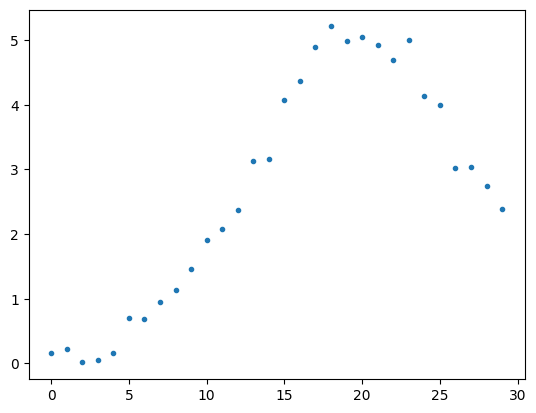

In [418]:
# def my_gauss_func(x, p):
#     t1 = p[1] * np.exp(-(x-p[2])**2/ (2 * p[3]**2))
#     y = p[0] + t1
#     return y

def my_gauss_func(x, params):
    # 定义模型函数
    return params[0] * np.exp(-((x - params[1]) / params[2]) ** 2)

n = 30
er =0.03
p = [5, 20, 10]
x = np.arange(n)
y0 = my_gauss_func(x, p)
ey = np.max(y0) * er * np.random.randn(n)
y = y0 + ey
plt.plot(x, y, ".")


### 高斯-牛顿法

In [419]:
threshold = 1e-6
lambda_reg = 1e-3  # 正则化参数
beta_0 = [5, 35, 13]
beta = np.array(beta_0, dtype=np.float64)
iter_cnt = 0

while True:
    J = numerical_jacobian(beta, x, y, my_gauss_func)
    r = residuals(beta, x, y, my_gauss_func)
    
    # 显式求解正则化方程
    JTJ = J.T @ J + lambda_reg * np.eye(J.shape[1]) # 借用Levenberg思想，引入正则项，保证可以正常求逆
    JTr = J.T @ r
    delta_beta = np.linalg.solve(JTJ, JTr) #解一个线性矩阵方程
    
    beta -= delta_beta  # 直接更新
    iter_cnt += 1

    # 终止条件
    if np.linalg.norm(delta_beta) < threshold or np.linalg.norm(r) < threshold or iter_cnt == 2000:
        break

print("迭代次数：", iter_cnt)
print("参数估计值：", beta)


迭代次数： 11
参数估计值： [ 5.11458268 19.96337914  9.72297881]


### Levenberg-Marquardt

对比发现，感觉计算结果好了很多，而且受初值影响更小了，主要是高斯-牛顿法不加正则项的话总是无法求逆

In [420]:
lambda_reg = 1e-3
lambda_inc = 10  # 当迭代失败时增加 lambda
lambda_dec = 0.1  # 当迭代成功时减少 lambda

beta_0 = [0, 35, 33]
beta = np.array(beta_0, dtype=np.float64)
iter_cnt = 0

while True:
    J = numerical_jacobian(beta, x, y, my_gauss_func)
    r = residuals(beta, x, y, my_gauss_func)
    
    JTJ = J.T @ J + lambda_reg * np.eye(J.shape[1])
    JTr = J.T @ r
    
    try:
        delta_beta = np.linalg.solve(JTJ, JTr)
        new_beta = beta - delta_beta
        
        # 计算新残差并判断是否接受
        new_r = residuals(new_beta, x, y, my_gauss_func)
        if np.linalg.norm(new_r) < np.linalg.norm(r):  # 收敛情况
            beta = new_beta
            lambda_reg *= lambda_dec  # 减小正则化项
        else:  # 不收敛
            lambda_reg *= lambda_inc  # 增大正则化项
    except np.linalg.LinAlgError:
        lambda_reg *= lambda_inc  # 矩阵奇异时增大正则化项
        
    iter_cnt += 1

    if np.linalg.norm(delta_beta) < threshold or np.linalg.norm(r) < threshold or iter_cnt == 2000:
        break

print("迭代次数：", iter_cnt)
print("参数估计值：", beta)

迭代次数： 13
参数估计值： [ 5.11458268 19.96337913  9.72297881]


In [421]:
J = numerical_jacobian(beta, x, y, my_gauss_func)
r = residuals(beta, x, y, my_gauss_func)

inv_H = np.linalg.inv(J.T @ J)
print("逆 hessian矩阵 inv_H： ", inv_H)
print("参数的协方差矩阵：", inv_H * r.var())

逆 hessian矩阵 inv_H：  [[ 0.13217189 -0.0245046  -0.21016198]
 [-0.0245046   0.37197281  0.15557227]
 [-0.21016198  0.15557227  0.9260799 ]]
参数的协方差矩阵： [[ 0.00469128 -0.00086976 -0.00745944]
 [-0.00086976  0.01320272  0.00552185]
 [-0.00745944  0.00552185  0.03287008]]


[ 5.11458268 19.96337913  9.72297881]


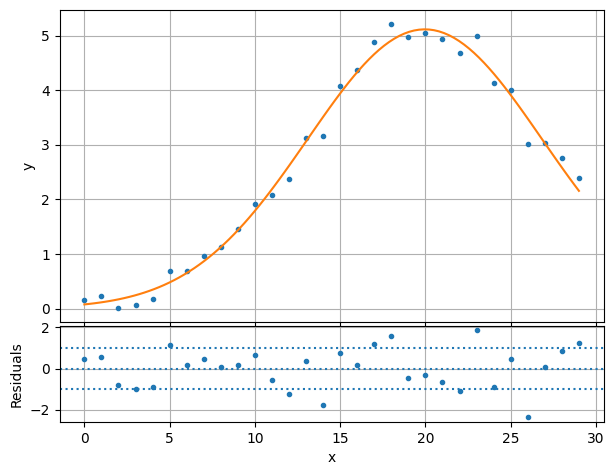

In [422]:
print(beta)
draw(x, y, beta, my_gauss_func)

### 对比调包的结果

可以发现估计的`参数`以及 `逆hessian矩阵`简直一摸一样

In [423]:
from scipy.optimize import leastsq

# 定义残差函数
def res_func(params, x, y):
    return y - my_gauss_func(x, params)

# 初始参数猜测
initial_guess = [0, 35, 33]

# 进行拟合
result = leastsq(res_func, initial_guess, args=(x, y), full_output=True)
result

(array([ 5.1145827 , 19.96337911,  9.72297875]),
 array([[ 0.13217192, -0.02450456, -0.2101619 ],
        [-0.02450456,  0.37197247,  0.15557191],
        [-0.2101619 ,  0.15557191,  0.92607896]]),
 {'fvec': array([ 0.08523868,  0.10983253, -0.15301908, -0.1876889 , -0.17636101,
          0.21678282,  0.03043086,  0.09347063,  0.01036929,  0.02897719,
          0.12539636, -0.11069256, -0.23522279,  0.06915965, -0.34465606,
          0.14072991,  0.02957703,  0.22603086,  0.30101715, -0.08414458,
         -0.06434824, -0.12722389, -0.2059877 ,  0.35889321, -0.17027632,
          0.09042706, -0.45596506,  0.01053495,  0.16807318,  0.23834744]),
  'nfev': 42,
  'fjac': array([[ 3.44743486,  0.00646363,  0.00955248,  0.01382189,  0.01958084,
           0.02715859,  0.03688036,  0.04903376,  0.06382743,  0.08134514,
           0.10150046,  0.12399851,  0.14831227,  0.17367999,  0.19912904,
           0.22352779,  0.24566346,  0.26433928,  0.2784806 ,  0.28723695,
           0.29006663,  0.